<a href="https://colab.research.google.com/github/Ryu-Yongju/Linear-Algebra-2/blob/main/%EB%B6%93%EA%BD%83%EB%B6%84%EB%A5%98%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

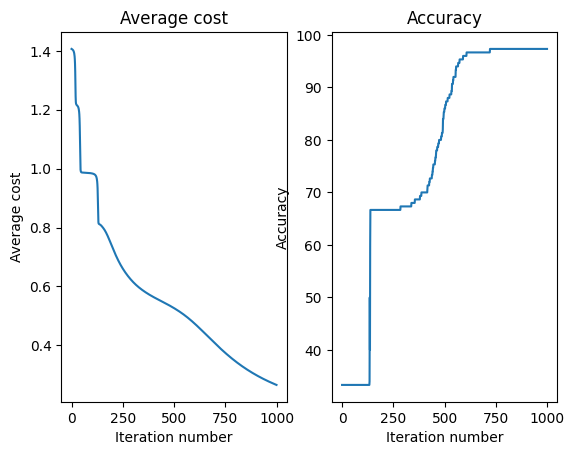

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
  return sigmoid(x)*(1-sigmoid(x))

def feed_forward(x, W1, W2, b1, b2):
  a1 = x
  z2 = np.dot(W1, a1) + b1
  a2 = sigmoid(z2)
  z3 = np.dot(W2, a2) + b2
  a3 = sigmoid(z3)
  return a1, a2, a3, z2, z3

def encode(arr):
    unique_vals = np.unique(arr)
    num_classes = len(unique_vals)
    encoded = np.zeros((arr.size, num_classes))
    for i, val in enumerate(arr):
        encoded[i, val] = 1
    return encoded

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Iris.csv")
df.replace(to_replace=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], value=[0, 1, 2], inplace=True)
Iris = df.to_numpy() # (150, 6)

node_size = {'input_layer_size': 4, 'hidden_layer_size': 12, 'output_layer_size': 3}
learning_rate = 0.7
count = 0
max_iteration = 1000
list_average_cost = []
list_accuracy = []

W2 = np.random.random((node_size['output_layer_size'], node_size['hidden_layer_size'])) # (3, 4)
W1 = np.random.random((node_size['hidden_layer_size'], node_size['input_layer_size'])) # (4, 4)
b2 = np.random.random((node_size['output_layer_size'])) # (3,)
b1 = np.random.random((node_size['hidden_layer_size'])) # (4,)
X = Iris[:, 1:5] # (150, 4)
Y = encode(Iris[:, -1].astype(int)) # (150, 3)
dataset_size = len(Y) # 150

while count < max_iteration:
  dW2 = np.zeros((node_size['output_layer_size'], node_size['hidden_layer_size']))
  dW1 = np.zeros((node_size['hidden_layer_size'], node_size['input_layer_size']))
  db2 = np.zeros(node_size['output_layer_size']) # (3,)
  db1 = np.zeros(node_size['hidden_layer_size']) # (4,)
  average_cost = 0
  correct = 0
  for x, y in zip(X, Y): # 150번 반복
    a1, a2, a3, z2, z3 = feed_forward(x, W1, W2, b1, b2) # a1:(4,), a2:(4,), a3:(3,), z2:(4,), z3:(3,)

    delta3 = -(y-a3) * sigmoid_derivative(z3)
    average_cost += np.linalg.norm((y-a3), 2) / dataset_size
    delta2 = np.dot(W2.T, delta3) * sigmoid_derivative(z2)
    dW2 += np.dot(delta3[:, np.newaxis], np.transpose(a2[:, np.newaxis])) / dataset_size
    db2 += delta3 / dataset_size
    dW1 += np.dot(delta2[:,np.newaxis], np.transpose(a1[:, np.newaxis])) / dataset_size
    db1 += delta2 / dataset_size

    if np.argmax(a3) == np.argmax(y):
      correct += 1

  W2 += -learning_rate * dW2
  b2 += -learning_rate * db2
  W1 += -learning_rate * dW1
  b1 += -learning_rate * db1

  list_average_cost.append(average_cost)
  accuracy = (correct / dataset_size) * 100
  list_accuracy.append(accuracy)
  count += 1

f, ax = plt.subplots(1, 2)
ax[0].title.set_text('Average cost')
ax[1].title.set_text('Accuracy')
ax[0].set_xlabel('Iteration number')
ax[0].set_ylabel('Average cost')
ax[0].plot(list_average_cost)
ax[1].set_xlabel('Iteration number')
ax[1].set_ylabel('Accuracy')
ax[1].plot(list_accuracy)
plt.show()